# Trabajo práctico N° 2

## Enunciado

Empleando algún método de separación en conjuntos de entrenamiento y test, resolver los siguientes ejercicios (extendiendo el código inicial que se muestra en la celda siguiente):

1. Declarar una variable random_state igual al número de alumno en la hoja de cálculo "Entregas TPs" en el Google Drive de la materia.

2. Elegir 1 feature (entre NOX (4), RM (5), AGE (6) y DIS (7)) y entrenar un modelo de regresión polinomial tomando en cuenta cómo dicho feature predice el valor de la casa. Para efectuar la separación entre subconjuntos de entrenamiento y test, usar el random_state correspondiente.

3. En base a dicho modelo, mostrar un gráfico donde se aprecie la distancia entre los valores de $\hat{y}$ y los valores de $y$ para el feature elegido (estilo al gráfico de regresión lineal o el gráfico de regresión polinomial utilizado como ejemplo en este notebook).

4. Entrenar con distintos grados del polinomio el modelo con el feature elegido. Graficar el bias-variance tradeoff para el error cuadrático medio en base a los distintos grados del polinomio, donde se muestren las curvas de error cuadrático medio de entrenamiento y error cuadrático medio de test. Ayuda: para graficarlo, utilizar el grado del polinomio en el eje de las $x$ y el error cuadrático medio en el eje de las $y$.

5. Especificar cuál es el grado del polinomio en el cual se minimiza el error de test.

6. Completar el código de KFolds para el modelo de regresión polinomial de grado 5, entrenarlo con el feature elegido e imprimir el error cuadrático medio, promediado entre los 10 folds. Utilizar Shuffle=true y el random_state correspondiente.

Fecha de entrega: **03/05/2017**.

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código del notebook está permitida (por ejemplo para confeccionar gráficos).

## Desarrollo

#### 1. Se declara la variable random_state con el numero de alumno correspondiente (3)

In [1]:
import numpy as np
semilla = np.random.RandomState(3)

#### 2. Se eligió el feature 5. Se entrena el modelo con un polinomio de grado 5 y se separan los subconjuntos con train_test_split

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
boston = load_boston()
X = boston.data
y = boston.target
X_feature = X[:,7]
# Agregar eje a X_feature para poder usarlo en train_test_split
X_feature = X_feature[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.3, random_state=semilla)
## Creamos el polinomio de grado 5
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 3. Se realiza un grafico donde se aprecie la distancia entre los valores de $\hat{y}$ y los valores de $y$

Grafico de entrenamiento 


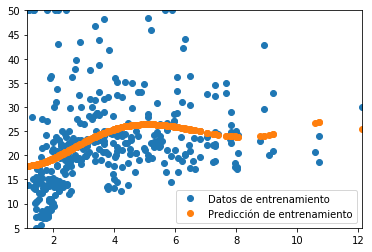

Grafico de test


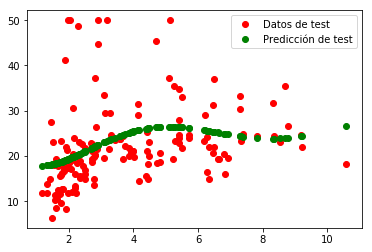

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline
axes = plt.subplot(111) # Establecemos límites fijos para el gráfico
axes.set_xlim(X_feature.min(), X_feature.max())
axes.set_ylim(y.min(), y.max())
plt.plot(X_train, y_train, 'o', label='Datos de entrenamiento')
plt.plot(X_train, poly_regressor.predict(X_train_poly), 'o', label='Predicción de entrenamiento')
print('Grafico de entrenamiento ')
plt.legend(loc='best')
plt.show()

X_test_poly = poly.transform(X_test)
plt.plot(X_test, y_test, 'o', color='red', label='Datos de test')
plt.plot(X_test, poly_regressor.predict(X_test_poly), 'o', color='green', label='Predicción de test')
plt.legend(loc='best')
print('Grafico de test')
plt.show()

#### 4. Se entrena con distintos grados del polinomio el modelo con el feature elegido. Graficar el bias-variance tradeoff para el error cuadrático medio en base a los distintos grados del polinomio, donde se muestren las curvas de error cuadrático medio de entrenamiento y error cuadrático medio de test.

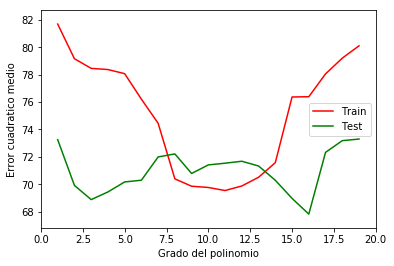

In [4]:
from sklearn.metrics import mean_squared_error
# Creamos las listas para graficar luego el error
x_grafico = list()
y_train_grafico = list()
y_test_grafico = list()

def entrenar(grado):
    poly = PolynomialFeatures(degree=grado)
    X_train_poly = poly.fit_transform(X_train, y_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)
    X_test_poly = poly.transform(X_test)
    x_grafico.append(grado)
    y_train_grafico.append(mean_squared_error(y_train, poly_regressor.predict(X_train_poly)))
    y_test_grafico.append(mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))

for g in range(1,20):
    entrenar(g)

# Definimos los maximos y minimos de "y" para que entren ambos graficos en en el mismo.
maximo = 0
minimo = 0
if min(y_train_grafico) <= min(y_test_grafico):
    minimo = min(y_train_grafico)
else:
    minimo = min(y_test_grafico)

if max(y_train_grafico) <= max(y_test_grafico):
    maximo = max(y_test_grafico)
else:
    maximo = max(y_train_grafico) 


# Graficamos con los vectores calculados
axes = plt.subplot(111)
axes.set_xlim(min(x_grafico) -1 , max(x_grafico) +1)
axes.set_ylim(minimo -1, maximo +1)
plt.ylabel('Error cuadratico medio')
plt.xlabel('Grado del polinomio')
plt.plot(x_grafico, y_train_grafico, '-', color='red', label='Train')
plt.plot(x_grafico, y_test_grafico, '-', color='green', label='Test')
plt.legend(loc='best');
plt.show()


#### 5. Se especifica cuál es el grado del polinomio en el cual se minimiza el error de test.

In [5]:
# Se guarda el indice del valor mas chico del vector y_test_grafico
indice_menor_error = y_test_grafico.index(min(y_test_grafico))
print('El grado del polinomio que minimiza el error es:', x_grafico[indice_menor_error], 'Con un error de:', min(y_test_grafico))

El grado del polinomio que minimiza el error es: 16 Con un error de: 67.8275744955


#### 6. Se completa el código de KFolds para el modelo de regresión polinomial de grado 5, se entrena con el feature elegido y se imprime el error cuadrático medio, promediado entre los 10 folds.

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True,random_state=semilla)

test_error_poly = []

for train_index, test_index in kf.split(X_feature):
    X_train_kfold, X_test_kfold = X_feature[train_index], X_feature[test_index]
    y_train_kfold, y_test_kfold = y[train_index], y[test_index]
    
    poly_kfold = PolynomialFeatures(degree=5)
    X_train_poly_kfold = poly_kfold.fit_transform(X_train_kfold, y_train_kfold)
    poly_regressor_kfold = LinearRegression()
    poly_regressor_kfold.fit(X_train_poly_kfold, y_train_kfold)
    X_test_poly_kfold = poly_kfold.transform(X_test_kfold)
    test_error_poly.append(mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))

print('El error cuadratico medio promediado en los 10 folds es:', np.average(test_error_poly))

El error cuadratico medio promediado en los 10 folds es: 70.1716226625
